# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [3]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('../../data/sentiment-analysis/reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('../../data/sentiment-analysis/labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [4]:
len(reviews)

25000

In [5]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [6]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [7]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [8]:
from collections import Counter
import numpy as np

In [9]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [10]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [11]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [12]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 300):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [13]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('wonderfully', 2.0218960560332353),
 ('beautifully', 1.7626953362841438),
 ('superb', 1.7091514458966952),
 ('touching', 1.637217476541176),
 ('stewart', 1.611998733295774),
 ('wonderful', 1.5645425925262093),
 ('fantastic', 1.5048433868558566),
 ('terrific', 1.5026699370083942),
 ('noir', 1.493925025312256),
 ('outstanding', 1.4910053152089213),
 ('excellent', 1.4647538505723599),
 ('gem', 1.3932148039644643),
 ('amazing', 1.3919815802404802),
 ('kelly', 1.3461743673304654),
 ('powerful', 1.2999662776313934),
 ('remarkable', 1.2883688239495823),
 ('favorite', 1.2668956297860055),
 ('stunning', 1.2622417124499117),
 ('perfect', 1.246742480713785),
 ('favourite', 1.2411123512753928),
 ('journey', 1.236762627148927),
 ('bond', 1.2321436812926323),
 ('brilliant', 1.2287554137664785),
 ('recommended', 1.2163953243244932),
 ('perfectly', 1.1971931173405572),
 ('emotions', 1.1753049094563641),
 ('subtle', 1.173413501750808),
 ('rare', 1.1566438362402944),
 ('loved', 1.1563661500586044),
 (

In [14]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('waste', -2.4907515123361046),
 ('pointless', -2.345107387713634),
 ('redeeming', -2.2667790015910296),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.132613384420701),
 ('lame', -1.9117232884159072),
 ('horrible', -1.844894301366784),
 ('pathetic', -1.8356498920533246),
 ('wasted', -1.7773187850732606),
 ('crap', -1.7677639636718392),
 ('badly', -1.6974777654416224),
 ('worse', -1.6820086052689358),
 ('terrible', -1.6742829939664696),
 ('mess', -1.6373136300125852),
 ('garbage', -1.6342944202026248),
 ('stupid', -1.604238019372532),
 ('dull', -1.5370486519863287),
 ('avoid', -1.5285820410306898),
 ('wooden', -1.5231262936001064),
 ('whatsoever', -1.4673642120941253),
 ('excuse', -1.465639637636481),
 ('ridiculous', -1.4643037391798193),
 ('boring', -1.4475226133603798),
 ('bother', -1.3837974809213034),
 ('dumb', -1.3830343745326832),
 ('annoying', -1.3279306437993517),
 ('bad', -1.3181383703873577),
 ('unless', -

# Transforming Text into Numbers

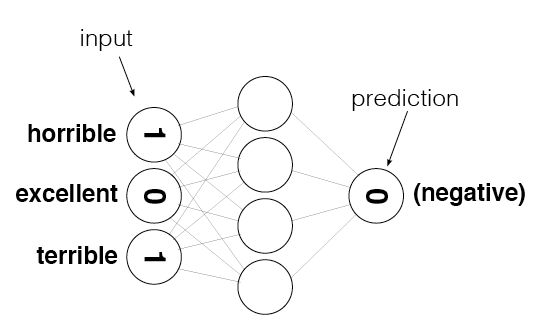

In [15]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

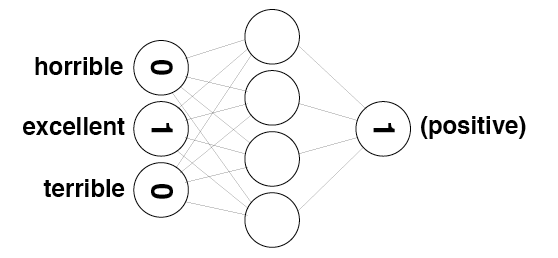

In [16]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data

In [17]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [18]:
list(vocab)

['',
 'dawn',
 'nadu',
 'nickles',
 'subjected',
 'unforgettable',
 'inadvertently',
 'unproven',
 'scuttling',
 'tao',
 'dullard',
 'pap',
 'kenji',
 'trembled',
 'chariots',
 'handlebar',
 'dorday',
 'chide',
 'hark',
 'cliches',
 'civil',
 'sullivan',
 'cub',
 'angsty',
 'eally',
 'teleporter',
 'trailers',
 'embellishes',
 'suckiness',
 'anthems',
 'turandot',
 'nwh',
 'limp',
 'chance',
 'bassett',
 'sargent',
 'boyfriendhe',
 'gaslight',
 'subconsciousness',
 'people',
 'tastefully',
 'legrand',
 'wan',
 'clothing',
 'distrustful',
 'nonreligious',
 'kurasowals',
 'curls',
 'pirovitch',
 'bullhit',
 'roseanne',
 'contradicts',
 'freefall',
 'internally',
 'rageddy',
 'unwholesome',
 'ack',
 'papamichael',
 'hollywoond',
 'distress',
 'halleck',
 'serriously',
 'wowzers',
 'cased',
 'renying',
 'exaggeration',
 'givings',
 'aircraft',
 'separating',
 'cassius',
 'piglet',
 'zdenek',
 'disharmony',
 'gladaitor',
 'astra',
 'potentialities',
 'stacie',
 'welll',
 'kaiser',
 'trubsha

In [19]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[0., 0., 0., ..., 0., 0., 0.]])

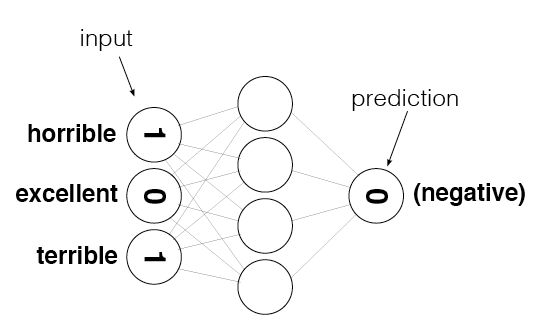

In [20]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [21]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'dawn': 1,
 'nadu': 2,
 'nickles': 3,
 'subjected': 4,
 'unforgettable': 5,
 'inadvertently': 6,
 'unproven': 7,
 'scuttling': 8,
 'tao': 9,
 'dullard': 10,
 'pap': 11,
 'kenji': 12,
 'trembled': 13,
 'chariots': 14,
 'handlebar': 15,
 'dorday': 16,
 'chide': 17,
 'hark': 18,
 'cliches': 19,
 'civil': 20,
 'sullivan': 21,
 'cub': 22,
 'angsty': 23,
 'eally': 24,
 'teleporter': 25,
 'trailers': 26,
 'embellishes': 27,
 'suckiness': 28,
 'anthems': 29,
 'turandot': 30,
 'nwh': 31,
 'limp': 32,
 'chance': 33,
 'bassett': 34,
 'sargent': 35,
 'boyfriendhe': 36,
 'gaslight': 37,
 'subconsciousness': 38,
 'people': 39,
 'tastefully': 40,
 'legrand': 41,
 'wan': 42,
 'clothing': 43,
 'distrustful': 44,
 'nonreligious': 45,
 'kurasowals': 46,
 'curls': 47,
 'pirovitch': 48,
 'bullhit': 49,
 'roseanne': 50,
 'contradicts': 51,
 'freefall': 52,
 'internally': 53,
 'rageddy': 54,
 'unwholesome': 55,
 'ack': 56,
 'papamichael': 57,
 'hollywoond': 58,
 'distress': 59,
 'halleck': 60,
 'ser

In [22]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [23]:
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [25]:
labels[0]

'POSITIVE'

In [26]:
get_target_for_label(labels[0])

1

In [27]:
labels[1]

'NEGATIVE'

In [28]:
get_target_for_label(labels[1])

0

# Project 3: Building a Neural Network

- Start with your neural network from the last chapter
- 3 layer neural network
- no non-linearity in hidden layer
- use our functions to create the training data
- create a "pre_process_data" function to create vocabulary for our training data generating functions
- modify "train" to train over the entire corpus

### Where to Get Help if You Need it
- Re-watch previous week's Udacity Lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (40% Off: **traskud17**)

In [29]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [30]:
net = SentimentNetwork(reviews[:-1000], labels[:-1000], learning_rate=0.001)

In [31]:
net.test(reviews[-1000:], labels[-1000:])

Progress:99.9% Speed(reviews/sec):1902.% #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [32]:
net.train(reviews[:-1000], labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):227.3 #Correct:1238 #Trained:2501 Training Accuracy:49.5%
Progress:20.8% Speed(reviews/sec):224.3 #Correct:2585 #Trained:5001 Training Accuracy:51.6%
Progress:31.2% Speed(reviews/sec):221.3 #Correct:4035 #Trained:7501 Training Accuracy:53.7%
Progress:41.6% Speed(reviews/sec):221.6 #Correct:5602 #Trained:10001 Training Accuracy:56.0%
Progress:52.0% Speed(reviews/sec):222.8 #Correct:7184 #Trained:12501 Training Accuracy:57.4%
Progress:62.5% Speed(reviews/sec):223.4 #Correct:8821 #Trained:15001 Training Accuracy:58.8%
Progress:72.9% Speed(reviews/sec):224.1 #Correct:10454 #Trained:17501 Training Accuracy:59.7%
Progress:83.3% Speed(reviews/sec):224.5 #Correct:12160 #Trained:20001 Training Accuracy:60.7%
Progress:93.7% Speed(reviews/sec):223.7 #Correct:13842 #Trained:22501 Training Accuracy:61.5%
Progress:99.9% Speed(reviews/sec):223.4 #Correct:14912 #Trained:24000 Training Ac